<div>
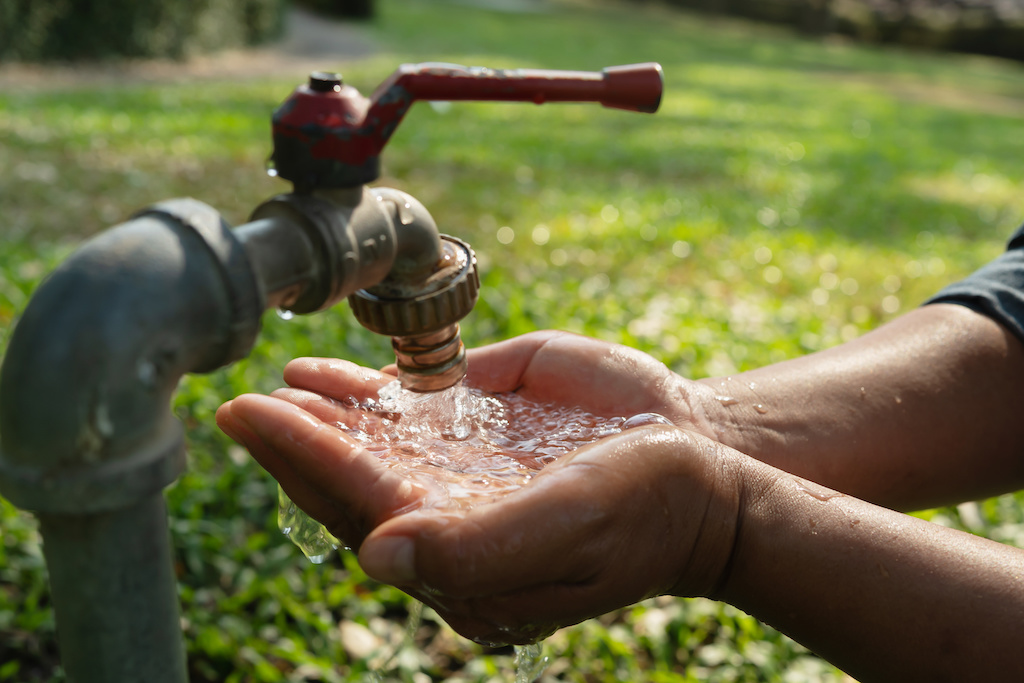
</div>
Photo by <a href="https://stock.adobe.com/contributor/203603884/lovelyday12?load_type=author&prev_url=detail" >lovelyday12</a> on Adobe Stock

# Phase 3 Project: *Tanzanian Water Pump Conditions Classification Model*

### By Ryan Posternak

Flatiron School, Full-Time Live NYC<br>
Project Presentation Date: July 15th, 2022<br>
Instructor: Joseph Mata

## Goal: Identify which water pumps in Tanzania are functional or in need of repair based on a variety of conditions and information on the pump

This is an asssignment for learning purposes. The Tanzanian Ministry of Water is not involved with this assignment in any way.

# Overview and Business Understanding

In the United States, most of us take for granted that we always have access to clean and safe drinking water. But for hundreds of millions of people across the world, they don't have this luxury. One such nation that is struggling with water insecurity is Tanzania, where as much as half the country–over 20 million people–<a href="https://lifewater.org/blog/tanzania-water-crisis-facts/" >do not have access to safe drinking water.</a><br>
<br>
In order to combat this crisis, <a href="http://taarifa.org/" >Taarifa</a> and the <a href="http://maji.go.tz/" >Tanzanian Ministry of Water </a> have teamed up to gather data on the nations many water pumps - the primary source of safe drinking water for most Tanzanians. Using this data, I build a classification model that predicts whether a water pump is functional or needs attention (either non-functional or in need of repair).<br>
<br>
Using this model, the Tanzanian Ministry of Water will be able to improve their efficiency in repairing dysfunctional water pumps, and improve access to clean drinking water for millions of people.<br>
<br>

<br>

# Data Understanding

This dataset was provided by Taarifa and the Tanzanian Ministry of Water, and was obtained from <a href="https://www.drivendata.org"> drivendata.org </a>as part of their <a href="https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/"> competition</a> entitled "Pump it Up: Data Mining the Water Table". The provided data was pre-split into training and testing data. As this dataset is part of a competition, labels were provided for the training data only. The training dataset contains 59,400 rows and 40 columns, while the testing dataset contains 14,850 rows.

<br>

# Exploratory Data Analysis

### Description of columns

**amount_tsh** - Total static head (amount water available to waterpoint)<br>
**date_recorded** - The date the row was entered<br>
**funder** - Who funded the well<br>
**gps_height** - Altitude of the well<br>
**installer** - Organization that installed the well<br>
**longitude** - GPS coordinate<br>
**latitude** - GPS coordinate<br>
**wpt_name** - Name of the waterpoint if there is one<br>
**basin** - Geographic water basin<br>
**subvillage** - Geographic location<br>
**region** - Geographic location<br>
**region_code** - Geographic location (coded)<br>
**district_code** - Geographic location (coded)<br>
**lga** - Geographic location<br>
**ward** - Geographic location<br>
**population** - Population around the well<br>
**public_meeting** - True/False<br>
**recorded_by** - Group entering this row of data<br>
**scheme_management** - Who operates the waterpoint<br>
**scheme_name** - Who operates the waterpoint<br>
**permit** - If the waterpoint is permitted<br>
**construction_year** - Year the waterpoint was constructed<br>
**extraction_type** - The kind of extraction the waterpoint uses<br>
**extraction_type_group** - The kind of extraction the waterpoint uses<br>
**extraction_type_class** - The kind of extraction the waterpoint uses<br>
**management** - How the waterpoint is managed<br>
**management_group** - How the waterpoint is managed<br>
**payment** - What the water costs<br>
**payment_type** - What the water costs<br>
**water_quality** - The quality of the water<br>
**quality_group** - The quality of the water<br>
**quantity** - The quantity of water<br>
**quantity_group** - The quantity of water<br>
**source** - The source of the water<br>
**source_type** - The source of the water<br>
**source_class** - The source of the water<br>
**waterpoint_type** - The kind of waterpoint<br>
**waterpoint_type_group** - The kind of waterpoint<br>
<br>

### Description of labels

**functional** - the waterpoint is operational and there are no repairs needed<br>
**functional needs repair** - the waterpoint is operational, but needs repairs<br>
**non functional** - the waterpoint is not operational

### Import libraries, packages and modules

In [200]:
import numpy as np
import pandas as pd

import folium

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import plotly.express as px
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.base import clone
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
confusion_matrix, plot_confusion_matrix, roc_auc_score, plot_roc_curve, log_loss

from joblib import parallel_backend
from sklearn import set_config
set_config(display='diagram')

import warnings
from sklearn.exceptions import UndefinedMetricWarning, ConvergenceWarning
from sklearn.utils._testing import ignore_warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load up the data

# Submission format example for competition
submission_format_df = pd.read_csv('data/Pump_it_Up_Data_Mining_the_Water_Table_-_Submission_format.csv')

# Load in X_train dataframe
X_train_df = pd.read_csv('data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv')

# Load in y_train dataframe
y_train_df = pd.read_csv('data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv')

# Load in X_test dataframe (for competition purposes only - will not be used as X_test dataframe for 
# train/test split purposes as labels were not included)
X_test_df = pd.read_csv('data/Pump_it_Up_Data_Mining_the_Water_Table_-_Test_set_values.csv')

In [3]:
# Preview features dataframe

print(X_train_df.shape)
X_train_df.head()

(59400, 40)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
# Preview target variables dataframe

y_train_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [5]:
# Preview distribution of target variables

print(y_train_df['status_group'].value_counts(), '\n')
print(y_train_df['status_group'].value_counts(normalize=True))

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64 

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64


> **Remarks:**
> - The dataset is somewhat imbalanced, with 54% in the 'functional' group, 38% in the 'non functional' group, and the remaining 7% in the 'functional needs repair' group

In [6]:
# Preview features dataframe info

X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

> **Remarks:**
> - 7 int features, 3 float features, 30 object features
> - Most features are nominal categorical descriptors, with many of the numerical descriptors actually being location identification variables
> - Some features with a lot of missing values: scheme_name, funder, installer, scheme_management


In [7]:
columns_isna = [column for column in X_train_df.columns if X_train_df[column].isna().sum() > 0]
    
print('Features with missing values:')
X_train_df[columns_isna].isna().sum()

Features with missing values:


funder                3635
installer             3655
subvillage             371
public_meeting        3334
scheme_management     3877
scheme_name          28166
permit                3056
dtype: int64

In [8]:
y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


> **Remarks:**
> - No missing `status_group` labels

In [9]:
X_train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


### Visualization of Water Pumps

To get an idea of the distribution of the different water pumps and their respective conditions, we'll build a folium map with each marker color-coded with the pump's condition. This may also give us some insight into any geographic trends that may be influencing the condition of the pumps.

In [10]:
# Coordinates of Dodoma - capital of Tanzania
dodoma_lat = -6.1630
dodoma_long = 35.7516

# Create a map of the area
base_map = folium.Map([dodoma_lat, dodoma_long], zoom_start=5.5)

# Add random sample of 300 water pumps to map, colored by water pump condition
for index, pump in X_train_df.sample(n=300).iterrows():
    lat = pump.latitude
    long = pump.longitude
    if y_train_df.iloc[index].status_group == 'functional':
        color = 'green'
    elif y_train_df.iloc[index].status_group == 'functional needs repair':
        color = 'orange'
    elif y_train_df.iloc[index].status_group == 'non functional':
        color = 'red'
    marker = folium.Marker(location=[lat, long])
    marker.add_to(base_map)
    popup_text = f"Condition: {y_train_df.iloc[index].status_group.capitalize()}"
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker(location=[lat, long], popup=popup, icon=folium.Icon(color))
    marker.add_to(base_map)
base_map

> **Remarks:**
> - There doesn't appear to be any obvious geographic trends affecting pump condition in the distribution of pumps across Tanzania

<br>

# Preprocessing

### Drop `id` column of X_train and y_train

ID numbers are not necessary for modeling purposes (I am assuming they carry no predictive value)

In [11]:
X_train_df.drop(columns='id', inplace=True)

y_train_df.drop(columns='id', inplace=True)

### Convert `status_group` column of y_train from ternary object to binary int: 0 if 'functional', 1 if 'functional needs repair' or 'non functional'

To simplify the modeling process, we'll convert this from a multi-class classification problem to a binary classification: 0 if the pump is functional and 1 if the pump needs attention

In [12]:
y_train_df.replace({'functional': 0, 'functional needs repair': 1, 'non functional': 1}, inplace=True)

# Sanity check
y_train_df.value_counts()

status_group
0               32259
1               27141
dtype: int64

### Drop additional valueless variables:

1. **`funder` and `installer`** - Who funded the well<br>
While some value may be lost by dropping these features, they would be cumbersome to work with as they contain thousands of unique values, and many of the values have only one corresponding row<br>
<br>
2. **`date_recorded`** - The date the row was entered<br>
Unlikely to carry any predictive value - date of construction is already captured in `construction_year`<br>
<br>
3. **`longitude`** and **`latitude`** - GPS coordinates<br>
Such specific location information is unlikely to carry much predictive value, and substantial location information is already captured in other columns<br>
<br>
4. **`num_private`** - Undisclosed<br>
It is undisclosed what this feature means, but 58,643 of the 59,400 rows all contain '0' for this feature and many of the values of the feature have only one corresponding row, so it would be cumbersome to work with and is unlikely to carry any predictive value anyway<br>
<br>
5. **`region`** - Geographic location<br>
Essentially the same information as `region_code` column, but with what appears to be slighly less granularity. Since `region_code` contains more granularity, we'll keep that one.<br>
<br>
6. **`wpt_name`** - Name of the waterpoint if there is one<br>
Unlikely to carry much predictive value — most of the values for this feature are unique to one row or have value 'none', and substantial waterpoint information is captured in other variables<br>
<br>
7. **`subvillage`** - Geographic location<br>
May potentially carry some predictive value, however substantial location information is already contained in other columns, and numerous subvillages exist with only a single row which would be tricky to deal with while modeling. Additionally, 371 missing values exist for this column.<br>
<br>
8. **`ward`** - Geographic location<br>
Contains over 2k unique values, many with only one corresponding row, which would be cumbersome to work with. Additionally, location information is captured in other variables.<br>
<br>
9. **`recorded_by`** - Group entering this row of data<br>
All rows have same value for this feature: 'GeoData Consultants Ltd'<br>
<br>
10. **`scheme_management`** and **`management_group`**- Who operates the waterpoint / How the waterpoint is managed<br>
`management`, `management_group`, and `scheme_management`, all contain largely the same information, with variations on the level of granularity. Since `management` contains more granular information than `management_group` and is missing fewer values than `scheme_management`, we'll keep that one.<br>
<br>
11. **`scheme_name`** - Who operates the waterpoint<br>
Feature contains 28,166 missing values, plus 664 where the value is equal to 'None'. Additionally, many of the values for this feature have only one corresponding row, and information on the operator is also captured in the `management` feature which has no missing values. As such, we'll drop this feature, though there may be a small amount of predictive value in it.<br>
<br>
12. **`extraction_type_group`** and **`extraction_type_class`** - The kind of extraction the waterpoint uses<br>
`extraction_type`, `extraction_type_group`, and `extraction_type_class` all contain largely the same information, with variations on the level of granularity. Since `extraction_type` contains the most granular information, we'll keep that one.<br>
<br>
13. **`payment`** - What the water costs<br>
Exact duplicate of information in column `payment_type`<br>
<br>
14. **`quality_group`** - The quality of the water<br>
Essentially the same information as `water_quality` column, with less granularity. Since `water_quality` contains more granularity, we'll keep that one.<br>
<br>
15. **`quantity_group`** - The quantity of water<br>
Exact duplicate of information in column `quantity`<br>
<br>
16. **`source_type`** and **`source_class`** - The source of the water<br>
`source`, `source_type`, and `source_class` all contain largely the same information, with variations on the level of granularity. Since `source` contains the most granular information, we'll keep that one.<br>
<br>
17. **`waterpoint_type_group`** - The kind of waterpoint<br>
Essentially the same information as `waterpoint_type` column, with less granularity. Since `waterpoint_type` contains more granularity, we'll keep that one.

In [13]:
columns_to_drop = ['funder', 'installer', 'date_recorded', 'longitude', 'latitude', 'num_private', 'region', 
                   'wpt_name', 'subvillage', 'ward', 'recorded_by', 'scheme_management', 'scheme_name', 
                   'extraction_type_group', 'extraction_type_class', 'management_group', 'payment', 
                   'quality_group', 'quantity_group', 'source_type', 'source_class', 'waterpoint_type_group']

X_train_df.drop(columns=columns_to_drop, inplace=True)

# Preview new dataframe
X_train_df.head()

,amount_tsh,gps_height,basin,region_code,district_code,lga,population,public_meeting,permit,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type
0,6000.0,1390,Lake Nyasa,11,5,Ludewa,109,True,False,1999,gravity,vwc,annually,soft,enough,spring,communal standpipe
1,0.0,1399,Lake Victoria,20,2,Serengeti,280,NaN,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe
2,25.0,686,Pangani,21,4,Simanjiro,250,True,True,2009,gravity,vwc,per bucket,soft,enough,dam,communal standpipe multiple
3,0.0,263,Ruvuma / Southern Coast,90,63,Nanyumbu,58,True,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple
4,0.0,0,Lake Victoria,18,1,Karagwe,0,True,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe


### Convert `region_code` and `district_code` to datatype 'object'

These features are actually nominal categorical features describing location, despite being in integer form. Converting them to datatype 'object' will make them easier to work with when it comes time to build pipelines.

In [14]:
X_train_df['region_code'] = X_train_df['region_code'].astype('object')

X_train_df['district_code'] = X_train_df['district_code'].astype('object')

### Convert `public_meeting` and `permit` columns from object to numeric: 0 if 'False', 1 if 'True'

Converting these from boolean to int will help when one hot encoding

In [15]:
X_train_df['public_meeting'].replace({False: 0, True: 1}, inplace=True)

X_train_df['permit'].replace({False: 0, True: 1}, inplace=True)

In [16]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59400 non-null  float64
 1   gps_height         59400 non-null  int64  
 2   basin              59400 non-null  object 
 3   region_code        59400 non-null  object 
 4   district_code      59400 non-null  object 
 5   lga                59400 non-null  object 
 6   population         59400 non-null  int64  
 7   public_meeting     56066 non-null  float64
 8   permit             56344 non-null  float64
 9   construction_year  59400 non-null  int64  
 10  extraction_type    59400 non-null  object 
 11  management         59400 non-null  object 
 12  payment_type       59400 non-null  object 
 13  water_quality      59400 non-null  object 
 14  quantity           59400 non-null  object 
 15  source             59400 non-null  object 
 16  waterpoint_type    594

### Drop rows with missing values for both `public_meeting` and `permit`

These are the only columns remaining that have missing values

In [17]:
columns_isna = [column for column in X_train_df.columns if X_train_df[column].isna().sum() > 0]
    
print('Features with missing values:')
X_train_df[columns_isna].isna().sum()

Features with missing values:


public_meeting    3334
permit            3056
dtype: int64

Since there aren't that many rows that have NaN values for both `public_meeting` and `permit`, we'll drop them. For the rest, we'll impute the most common value, which is 1.0 for both, which is performed in our ColumnTransformer.

In [18]:
X_train_df[X_train_df[['public_meeting', 'permit']].isnull().all(axis=1)].head()

,amount_tsh,gps_height,basin,region_code,district_code,lga,population,public_meeting,permit,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type
190,0.0,1660,Internal,13,2,Singida Rural,1,NaN,NaN,2010,submersible,vwc,unknown,unknown,unknown,machine dbh,communal standpipe
551,0.0,1525,Internal,13,2,Singida Rural,1,NaN,NaN,1980,other,vwc,unknown,unknown,dry,shallow well,other
615,0.0,1253,Internal,13,2,Singida Rural,1,NaN,NaN,2000,other,vwc,never pay,soft,insufficient,rainwater harvesting,communal standpipe
728,0.0,1475,Lake Victoria,20,2,Serengeti,300,NaN,NaN,2009,submersible,private operator,other,salty,enough,machine dbh,other
786,0.0,1414,Lake Victoria,20,2,Serengeti,393,NaN,NaN,2009,gravity,other,unknown,soft,seasonal,rainwater harvesting,communal standpipe


In [19]:
len_rows_nan_both = X_train_df[X_train_df[['public_meeting', 'permit']].isnull().all(axis=1)].shape[0]

print(f'Number of rows with missing values for both public_meeting and permit:  {len_rows_nan_both}')
print(f'Percent of rows with missing values for both public_meeting and permit:  \
{round((len_rows_nan_both / X_train_df.shape[0] * 100), 3)}%')

Number of rows with missing values for both public_meeting and permit:  271
Percent of rows with missing values for both public_meeting and permit:  0.456%


In [20]:
print(X_train_df['public_meeting'].value_counts())
print()
print(X_train_df['permit'].value_counts())

1.0    51011
0.0     5055
Name: public_meeting, dtype: int64

1.0    38852
0.0    17492
Name: permit, dtype: int64


In [21]:
indexes_to_drop = X_train_df[X_train_df[['public_meeting', 'permit']].isnull().all(axis=1)].index

X_train_df.drop(index=indexes_to_drop, inplace=True)
y_train_df.drop(index=indexes_to_drop, inplace=True)

X_train_df.shape

(59129, 17)

### Examine `construction_year` column

A value of '0' seems to be a placeholder for "Unknown" for this column. We'll impute the median here, which is performed in our ColumnTransformer.

In [22]:
X_train_df.construction_year.value_counts()[:5]

0       20681
2010     2609
2008     2607
2009     2514
2000     2047
Name: construction_year, dtype: int64

<br>

# Train/Test Split

As we saw above, this is an unbalanced dataset, so we'll set stratify=y to ensure an even balance of labels between train and test sets. We'll keep the default test size of 0.25.

In [23]:
X = X_train_df.copy()
y = y_train_df.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [24]:
print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Testing set: {X_test.shape}, {y_test.shape}')
print()

# Check that target variables are evenly distributed between y_train and y_test
print(f'Training set: {y_train.value_counts(normalize=True)}')
print(f'Testing set: {y_test.value_counts(normalize=True)}')

Training set: (44346, 17), (44346, 1)
Testing set: (14783, 17), (14783, 1)

Training set: status_group
0               0.542913
1               0.457087
dtype: float64
Testing set: status_group
0               0.542921
1               0.457079
dtype: float64


<br>

# Create ColumnTransformer to Preprocess Data

**Rundown:**
- Impute NaN values in `public_meeting` and `permit` columns with value of 1.0<br>
<br>
- Impute '0' values in `construction_year` with the median value, then standard scale<br>
<br>
- Standard scale the remaining numeric columns (`amount_tsh`, `gps_height`, and `population`)<br>
<br>
- One hot encode categorical columns

In [25]:
con_year_pipeline = Pipeline([
    ('con_year_imputer', SimpleImputer(missing_values=0, strategy='median')), 
    ('standard_scale', StandardScaler())
    ])

numeric_pipeline = Pipeline([ 
    ('standard_scale', StandardScaler())
    ])

categorical_pipeline = Pipeline([
    ('one_hot_encode', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'))
     ])

# Numerical columns, not including construction_year or the two boolean columns
ss_cols = ['amount_tsh', 'gps_height', 'population']
# Categorical columns
ohe_cols = list(X_train.select_dtypes('object').columns)

ct = ColumnTransformer([
    ('ss_pipe', numeric_pipeline, ss_cols), 
    ('bool_imputer', SimpleImputer(strategy='constant', fill_value=1.0), ['public_meeting', 'permit']), 
    ('con_year_pipe', con_year_pipeline, ['construction_year']), 
    ('ohe_pipe', categorical_pipeline, ohe_cols)
    ], 
    remainder='passthrough')

ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('ss_pipe',
                                 Pipeline(steps=[('standard_scale',
                                                  StandardScaler())]),
                                 ['amount_tsh', 'gps_height', 'population']),
                                ('bool_imputer',
                                 SimpleImputer(fill_value=1.0,
                                               strategy='constant'),
                                 ['public_meeting', 'permit']),
                                ('con_year_pipe',
                                 Pipeline(steps=[('con_year_imputer',
                                                  SimpleImputer(missing_values=0,
                                                                strategy='median')),
                                                 ('standard_scale',
                                                  StandardScaler())]),
                                 ['construction_year']),
                                ('ohe_pipe',
                                 Pipeline(steps=[('one_hot_encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['basin', 'region_code', 'district_code',
                                  'lga', 'extraction_type', 'management',
                                  'payment_type', 'water_quality', 'quantity',
                                  'source', 'waterpoint_type'])])

In [26]:
pd.DataFrame(ct.fit_transform(X_train), columns=ct.get_feature_names_out())

,ss_pipe__amount_tsh,ss_pipe__gps_height,ss_pipe__population,bool_imputer__public_meeting,bool_imputer__permit,con_year_pipe__construction_year,ohe_pipe__basin_Lake Nyasa,ohe_pipe__basin_Lake Rukwa,ohe_pipe__basin_Lake Tanganyika,ohe_pipe__basin_Lake Victoria,...,ohe_pipe__source_river,ohe_pipe__source_shallow well,ohe_pipe__source_spring,ohe_pipe__source_unknown,ohe_pipe__waterpoint_type_communal standpipe,ohe_pipe__waterpoint_type_communal standpipe multiple,ohe_pipe__waterpoint_type_dam,ohe_pipe__waterpoint_type_hand pump,ohe_pipe__waterpoint_type_improved spring,ohe_pipe__waterpoint_type_other
0,-0.098448,0.072594,-0.361383,1.0,1.0,0.009643,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.088313,-0.734494,-0.332125,0.0,1.0,0.698225,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.105204,-0.959728,-0.373922,1.0,1.0,0.206380,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.105204,-0.929408,0.733708,1.0,1.0,-0.482202,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.105204,1.442765,0.921796,1.0,0.0,1.288438,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44341,-0.105204,0.436433,0.294835,1.0,1.0,-0.482202,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44342,0.232608,1.123684,0.305285,1.0,1.0,0.009643,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44343,-0.095069,-0.415413,0.462025,1.0,1.0,-0.875677,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
44344,-0.105204,-0.959728,-0.373922,1.0,1.0,0.206380,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<br>

# Create Function to Cross Validate and Print Model Scores

In [27]:
def print_cv_scores(pipe, X, y):
    '''
    Runs cross_validate on given feature and multiclass target arrays 
    using given pipeline and prints the training and cross_val scores
    '''
    # Ensure consistent results with random.seed
    np.random.seed(42)
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    # Pass in pipe to cross validate along with a feature list
    results = cross_validate(pipe, X, y, return_train_score=True, scoring=scoring)
    
    print(f"Training Accuracy: {round(results['train_accuracy'].mean(), 6)}")
    print(f"Cross_Val Accuracy: {round(results['test_accuracy'].mean(), 6)}")
    print('-'*40)
    print(f"Training Precision: {round(results['train_precision'].mean(), 6)}")
    print(f"Cross_Val Precision: {round(results['test_precision'].mean(), 6)}")
    print('-'*40)
    print(f"Training Recall: {round(results['train_recall'].mean(), 6)}")
    print(f"Cross_Val Recall: {round(results['test_recall'].mean(), 6)}")
    print('-'*40)
    print(f"Training F1 Score: {round(results['train_f1'].mean(), 6)}")
    print(f"Cross_Val F1 Score: {round(results['test_f1'].mean(), 6)}")

<br>

# Baseline: Dummy Classifier

In [28]:
steps=[('preprocessing', ct), 
       ('dc', DummyClassifier(strategy='most_frequent'))]

dummy_pipe = Pipeline(steps)

dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss_pipe',
                                                  Pipeline(steps=[('standard_scale',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population']),
                                                 ('bool_imputer',
                                                  SimpleImputer(fill_value=1.0,
                                                                strategy='constant'),
                                                  ['public_meeting', 'permit']),
                                                 ('con_year_pipe',
                                                  Pipeline(steps=[('con_year_imputer',
                                                                   Simple...
                                                                   StandardScaler())]),
                                                  ['construction_year']),
                                                 ('ohe_pipe',
                                                  Pipeline(steps=[('one_hot_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['basin', 'region_code',
                                                   'district_code', 'lga',
                                                   'extraction_type',
                                                   'management', 'payment_type',
                                                   'water_quality', 'quantity',
                                                   'source',
                                                   'waterpoint_type'])])),
                ('dc', DummyClassifier(strategy='most_frequent'))])

In [29]:
# Ignore UndefinedMetricWarnings being thrown due to the model being a dummy classifier
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)
# Ignore UserWarnings being thrown
warnings.filterwarnings('ignore', category=UserWarning)

print_cv_scores(dummy_pipe, X_train, y_train.values.ravel())

Training Accuracy: 0.542913
Cross_Val Accuracy: 0.542913
----------------------------------------
Training Precision: 0.0
Cross_Val Precision: 0.0
----------------------------------------
Training Recall: 0.0
Cross_Val Recall: 0.0
----------------------------------------
Training F1 Score: 0.0
Cross_Val F1 Score: 0.0


> **Remarks:**
> - Since this is a dummy classifier that classifies everything as the most frequent label in the dataset, we get an accuracy score equivalent to the proportion of the most frequent label in the dataset. Since this label is '0' in this dataset, we have only true positives and no true negatives, so the other three scores are zero.

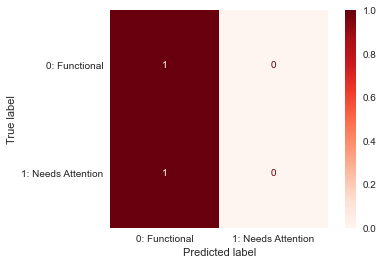

In [30]:
# Define confusion matrix label names
class_names = ['0: Functional', '1: Needs Attention']

# Plot confusion matrix on testing data
plot_confusion_matrix(dummy_pipe, X_test, y_test, normalize='true', display_labels=class_names, cmap='Reds')
plt.grid(False);

Log-loss: 15.78695
AUC score: 0.5


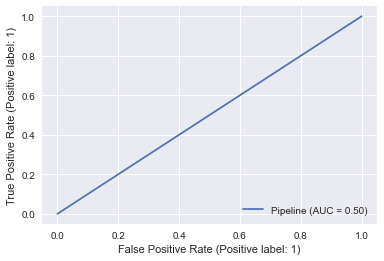

In [31]:
probas = dummy_pipe.predict_proba(X_test)[:, 1]

# Print log-loss on testing data
print(f"Log-loss: {round(log_loss(y_test, probas), 5)}")

# Print AUC score on testing data
print(f"AUC score: {round(roc_auc_score(y_test, probas), 5)}")

# Plot roc_curve on testing data
plot_roc_curve(dummy_pipe, X_test, y_test);

> **Remarks:**
> - To no one's surprise, the dummy model doesn't perform very well. This is just a baseline to compare future models against.

<br>

# Model 1.1: Logistic Regression Classifier, Iteration 1

Let's start the real modeling process with a vanilla LogisticRegression model

In [32]:
# Take all the default argument for LogisticRegression model
steps=[('preprocessing', ct), 
       ('logreg', LogisticRegression(random_state=42))]

lr_1_pipe = Pipeline(steps)

lr_1_pipe.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss_pipe',
                                                  Pipeline(steps=[('standard_scale',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population']),
                                                 ('bool_imputer',
                                                  SimpleImputer(fill_value=1.0,
                                                                strategy='constant'),
                                                  ['public_meeting', 'permit']),
                                                 ('con_year_pipe',
                                                  Pipeline(steps=[('con_year_imputer',
                                                                   Simple...
                                                                   StandardScaler())]),
                                                  ['construction_year']),
                                                 ('ohe_pipe',
                                                  Pipeline(steps=[('one_hot_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['basin', 'region_code',
                                                   'district_code', 'lga',
                                                   'extraction_type',
                                                   'management', 'payment_type',
                                                   'water_quality', 'quantity',
                                                   'source',
                                                   'waterpoint_type'])])),
                ('logreg', LogisticRegression(random_state=42))])

In [33]:
# Ignore ConvergenceWarnings being thrown due to lack of convergence in gradient descent
warnings.filterwarnings('ignore', category=ConvergenceWarning)

print_cv_scores(lr_1_pipe, X_train, y_train.values.ravel())

Training Accuracy: 0.770064
Cross_Val Accuracy: 0.767285
----------------------------------------
Training Precision: 0.790224
Cross_Val Precision: 0.786569
----------------------------------------
Training Recall: 0.676554
Cross_Val Recall: 0.673804
----------------------------------------
Training F1 Score: 0.728984
Cross_Val F1 Score: 0.725787


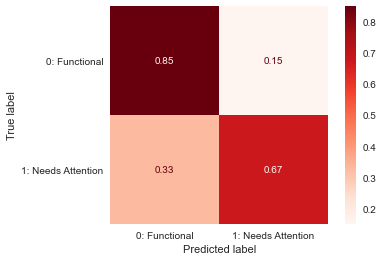

In [34]:
# Plot confusion matrix
class_names = ['0: Functional', '1: Needs Attention']
plot_confusion_matrix(lr_1_pipe, X_test, y_test, normalize='true', display_labels=class_names, cmap='Reds')
plt.grid(False);

Log-loss: 0.47575
AUC score: 0.84306


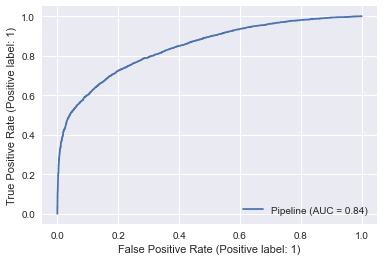

In [35]:
probas = lr_1_pipe.predict_proba(X_test)[:, 1]

# Print log-loss
print(f"Log-loss: {round(log_loss(y_test, probas), 5)}")

# Print AUC score
print(f"AUC score: {round(roc_auc_score(y_test, probas), 5)}")

# Plot roc_curve
plot_roc_curve(lr_1_pipe, X_test, y_test);

> **Remarks:**
> - We're not doing too bad with a vanilla LogisticRegression model. Nearly 77% accuracy and 73% F1 score. We seem to be doing better classifying positives than negatives so far.

<br>

# Model 1.2: Logistic Regression Classifier, Iteration 2

Let's try tuning some of the hyperparameters of the LogisticRegression model with a GridSearchCV. Specifically, we'll try to optimize the regularization strength, `C`, and the maximum number of iterations, `max_iter`, to improve the model.

In [36]:
# steps=[('preprocessing', ct), 
#        ('logreg', LogisticRegression(random_state=42))]

# lr_2_pipe = Pipeline(steps)

# pipe_grid = {'logreg__C': list(range(15, 28, 3)), 
#              'logreg__max_iter': [100, 200]}

# lr_2_gs_pipe = GridSearchCV(estimator=lr_2_pipe, 
#                             param_grid=pipe_grid, 
#                             cv=5,  # 5-fold cross-validation
#                             n_jobs=-1,  # Speed up computational time by using all processors
#                             verbose=True)  # Print how many folds, candidates, and fits we're solving for

# with parallel_backend('threading', n_jobs=-1):
#     lr_2_gs_pipe.fit(X_train, y_train.values.ravel())

# print(lr_2_gs_pipe.best_params_)

In [37]:
# Create new LogisticRegression classifier model with optimal hyperparameters found above
optimal_C = 15  # lr_2_gs_pipe.best_params_['logreg__C']
optimal_max_iter = 200  # lr_2_gs_pipe.best_params_['logreg__max_iter']

steps=[('preprocessing', ct), 
       ('logreg', LogisticRegression(C=optimal_C, max_iter=optimal_max_iter, random_state=42))]

lr_2_pipe = Pipeline(steps)

lr_2_pipe.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss_pipe',
                                                  Pipeline(steps=[('standard_scale',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population']),
                                                 ('bool_imputer',
                                                  SimpleImputer(fill_value=1.0,
                                                                strategy='constant'),
                                                  ['public_meeting', 'permit']),
                                                 ('con_year_pipe',
                                                  Pipeline(steps=[('con_year_imputer',
                                                                   Simple...
                                                  ['construction_year']),
                                                 ('ohe_pipe',
                                                  Pipeline(steps=[('one_hot_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['basin', 'region_code',
                                                   'district_code', 'lga',
                                                   'extraction_type',
                                                   'management', 'payment_type',
                                                   'water_quality', 'quantity',
                                                   'source',
                                                   'waterpoint_type'])])),
                ('logreg',
                 LogisticRegression(C=15, max_iter=200, random_state=42))])

In [38]:
print_cv_scores(lr_2_pipe, X_train, y_train.values.ravel())

Training Accuracy: 0.770396
Cross_Val Accuracy: 0.76742
----------------------------------------
Training Precision: 0.789744
Cross_Val Precision: 0.785618
----------------------------------------
Training Recall: 0.678256
Cross_Val Recall: 0.675629
----------------------------------------
Training F1 Score: 0.729765
Cross_Val F1 Score: 0.726441


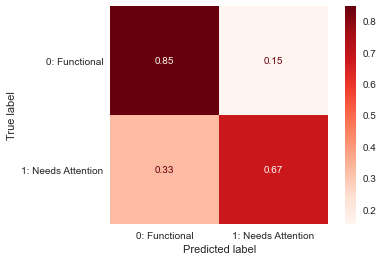

In [39]:
# Plot confusion matrix
plot_confusion_matrix(lr_2_pipe, X_test, y_test, normalize='true', display_labels=class_names, cmap='Reds')
plt.grid(False);

Log-loss: 0.47562
AUC score: 0.84329


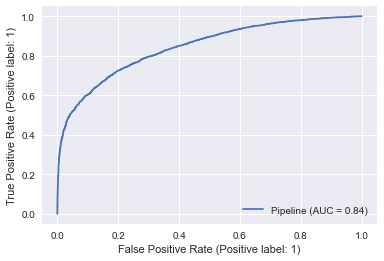

In [40]:
probas = lr_2_pipe.predict_proba(X_test)[:, 1]

# Print log-loss
print(f"Log-loss: {round(log_loss(y_test, probas), 5)}")

# Print AUC score
print(f"AUC score: {round(roc_auc_score(y_test, probas), 5)}")

# Plot roc_curve
plot_roc_curve(lr_2_pipe, X_test, y_test);

> **Remarks:**
> - After tuning for optimal regularization strength and max iterations, we got very slight improvements in the log_loss and AUC scores. Our cross-validated scores all improved very slightly as well. While not drastic, we'll keep these new hyperparameters since it did improve the performance of the model.

<br>

# Model 1.3: Logistic Regression Classifier, Iteration 3

Let's now keep the tuned hyperparameters found from the previous GridSearchCV, and try another grid search to see if the default solver - lbfgs, the one we're using - is the optimal one.

In [41]:
# steps=[('preprocessing', ct), 
#        ('logreg', LogisticRegression(random_state=42))]

# lr_3_pipe = Pipeline(steps)

# pipe_grid = {'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# lr_3_gs_pipe = GridSearchCV(estimator=lr_3_pipe, 
#                             param_grid=pipe_grid, 
#                             cv=5, 
#                             n_jobs=-1, 
#                             verbose=True)

# with parallel_backend('threading', n_jobs=-1):
#     lr_3_gs_pipe.fit(X_train, y_train.values.ravel())

# print(lr_3_gs_pipe.best_params_)

In [42]:
optimal_solver = 'newton-cg'  # lr_3_gs_pipe.best_params_['logreg__solver']

steps=[('preprocessing', ct), 
       ('logreg', LogisticRegression(solver=optimal_solver, C=optimal_C, max_iter=optimal_max_iter, random_state=42))]

lr_3_pipe = Pipeline(steps)

lr_3_pipe.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss_pipe',
                                                  Pipeline(steps=[('standard_scale',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population']),
                                                 ('bool_imputer',
                                                  SimpleImputer(fill_value=1.0,
                                                                strategy='constant'),
                                                  ['public_meeting', 'permit']),
                                                 ('con_year_pipe',
                                                  Pipeline(steps=[('con_year_imputer',
                                                                   Simple...
                                                  ['construction_year']),
                                                 ('ohe_pipe',
                                                  Pipeline(steps=[('one_hot_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['basin', 'region_code',
                                                   'district_code', 'lga',
                                                   'extraction_type',
                                                   'management', 'payment_type',
                                                   'water_quality', 'quantity',
                                                   'source',
                                                   'waterpoint_type'])])),
                ('logreg',
                 LogisticRegression(C=15, max_iter=200, random_state=42,
                                    solver='newton-cg'))])

In [43]:
print_cv_scores(lr_3_pipe, X_train, y_train)

Training Accuracy: 0.770554
Cross_Val Accuracy: 0.767487
----------------------------------------
Training Precision: 0.790321
Cross_Val Precision: 0.786041
----------------------------------------
Training Recall: 0.677874
Cross_Val Recall: 0.675185
----------------------------------------
Training F1 Score: 0.72979
Cross_Val F1 Score: 0.726366


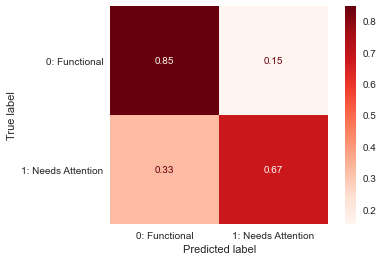

In [44]:
# Plot confusion matrix
plot_confusion_matrix(lr_3_pipe, X_test, y_test, normalize='true', display_labels=class_names, cmap='Reds')
plt.grid(False);

Log-loss: 0.47547
AUC score: 0.84332


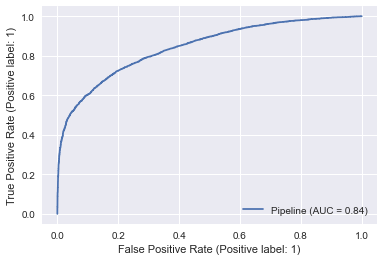

In [45]:
probas = lr_3_pipe.predict_proba(X_test)[:, 1]

# Print log-loss
print(f"Log-loss: {round(log_loss(y_test, probas), 5)}")

# Print AUC score
print(f"AUC score: {round(roc_auc_score(y_test, probas), 5)}")

# Plot roc_curve
plot_roc_curve(lr_3_pipe, X_test, y_test);

> **Remarks:**
> - This GridSearchCV told us that the 'newton-cg' solver would be better than the default 'lbfgs' solver. It looks like our scores did improve, but barely. We'll accept this model as our final LogisticRegression model.

<br>

# Model 2.1: K-Nearest Neighbors

Let's try our next classification model: k-nearest neighbors. In the interest of time, we'll skip the vanilla model and go right to using a GridSearchCV to look for optimal hyperparameters. We'll try out two different `n_neighbors` values and two different `p` values, which is the power parameter for the Minkowski metric. A value of 1 is Manhattan distance while a value of 2 is Euclidean distance.

In [46]:
# steps=[('preprocessing', ct), 
#        ('knn', KNeighborsClassifier())]

# knn_1_pipe = Pipeline(steps)

# pipe_grid = {'knn__n_neighbors': [5, 9], 
#              'knn__p': [1, 2]}

# knn_1_gs_pipe = GridSearchCV(estimator=knn_1_pipe, 
#                             param_grid=pipe_grid, 
#                             cv=3,  # KNN classifiers can be computationally expensive; reduce the k-fold count
#                             n_jobs=-1, 
#                             verbose=True)

# with parallel_backend('threading', n_jobs=-1):
#     knn_1_gs_pipe.fit(X_train, y_train.values.ravel())

# print(knn_1_gs_pipe.best_params_)

In [47]:
# Create KNN classifier model with optimal hyperparameters found above
optimal_n_neighbors = 5  # knn_1_gs_pipe.best_params_['knn__n_neighbors']
optimal_p = 1  # knn_1_gs_pipe.best_params_['knn__p']

steps=[('preprocessing', ct), 
       ('logreg', KNeighborsClassifier(n_neighbors=optimal_n_neighbors, p=optimal_p))]

knn_1_pipe = Pipeline(steps)

knn_1_pipe.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss_pipe',
                                                  Pipeline(steps=[('standard_scale',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population']),
                                                 ('bool_imputer',
                                                  SimpleImputer(fill_value=1.0,
                                                                strategy='constant'),
                                                  ['public_meeting', 'permit']),
                                                 ('con_year_pipe',
                                                  Pipeline(steps=[('con_year_imputer',
                                                                   Simple...
                                                                  ('standard_scale',
                                                                   StandardScaler())]),
                                                  ['construction_year']),
                                                 ('ohe_pipe',
                                                  Pipeline(steps=[('one_hot_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['basin', 'region_code',
                                                   'district_code', 'lga',
                                                   'extraction_type',
                                                   'management', 'payment_type',
                                                   'water_quality', 'quantity',
                                                   'source',
                                                   'waterpoint_type'])])),
                ('logreg', KNeighborsClassifier(p=1))])

In [48]:
print_cv_scores(knn_1_pipe, X_train, y_train)

Training Accuracy: 0.839777
Cross_Val Accuracy: 0.781401
----------------------------------------
Training Precision: 0.845921
Cross_Val Precision: 0.779917
----------------------------------------
Training Recall: 0.794117
Cross_Val Recall: 0.726936
----------------------------------------
Training F1 Score: 0.8192
Cross_Val F1 Score: 0.752454


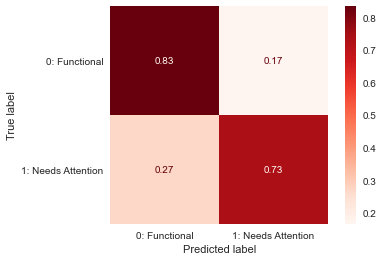

In [49]:
# Plot confusion matrix
plot_confusion_matrix(knn_1_pipe, X_test, y_test, normalize='true', display_labels=class_names, cmap='Reds')
plt.grid(False);

Log-loss: 1.76617
AUC score: 0.85697


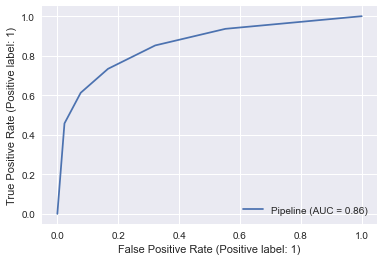

In [50]:
probas = knn_1_pipe.predict_proba(X_test)[:, 1]

# Print log-loss
print(f"Log-loss: {round(log_loss(y_test, probas), 5)}")

# Print AUC score
print(f"AUC score: {round(roc_auc_score(y_test, probas), 5)}")

# Plot roc_curve
plot_roc_curve(knn_1_pipe, X_test, y_test);

> **Remarks:**
> - This KNN classifier was computationally expensive, but worth it. KNN solidly outperformed our best logistic regression classifier in cross-validated accuracy, getting about a 2% bump. The F1 score improved even more, getting a 3% boost. The improvement in AUC was more modest at about 1%. Our log-loss score actually increased (which means it worsened). With that said, log-loss is a good performance metric within classification model types but not across classification model types, so it's not worth putting too much stock into that.

<br>

# Model 3.1: Decision Tree, Iteration 1

Let's move on to our next classifier: decision trees. We'll start with a vanilla decision tree model - just the default hyperparameters. Sklearn decision trees are known to overfit by default, so we should expect to do well on the training data but probably not so great on the testing data.

In [51]:
steps=[('preprocessing', ct), 
       ('dt', DecisionTreeClassifier(random_state=42))]

dt_1_pipe = Pipeline(steps)

dt_1_pipe.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss_pipe',
                                                  Pipeline(steps=[('standard_scale',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population']),
                                                 ('bool_imputer',
                                                  SimpleImputer(fill_value=1.0,
                                                                strategy='constant'),
                                                  ['public_meeting', 'permit']),
                                                 ('con_year_pipe',
                                                  Pipeline(steps=[('con_year_imputer',
                                                                   Simple...
                                                                   StandardScaler())]),
                                                  ['construction_year']),
                                                 ('ohe_pipe',
                                                  Pipeline(steps=[('one_hot_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['basin', 'region_code',
                                                   'district_code', 'lga',
                                                   'extraction_type',
                                                   'management', 'payment_type',
                                                   'water_quality', 'quantity',
                                                   'source',
                                                   'waterpoint_type'])])),
                ('dt', DecisionTreeClassifier(random_state=42))])

In [52]:
print_cv_scores(dt_1_pipe, X_train, y_train)

Training Accuracy: 0.949956
Cross_Val Accuracy: 0.774072
----------------------------------------
Training Precision: 0.964941
Cross_Val Precision: 0.762331
----------------------------------------
Training Recall: 0.924112
Cross_Val Recall: 0.734928
----------------------------------------
Training F1 Score: 0.944072
Cross_Val F1 Score: 0.748321


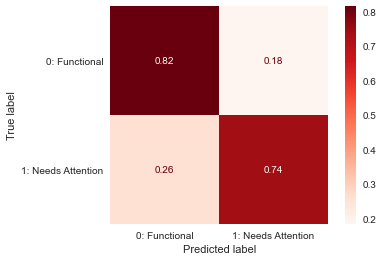

In [53]:
# Plot confusion matrix
plot_confusion_matrix(dt_1_pipe, X_test, y_test, normalize='true', display_labels=class_names, cmap='Reds')
plt.grid(False);

Log-loss: 5.86533
AUC score: 0.79302


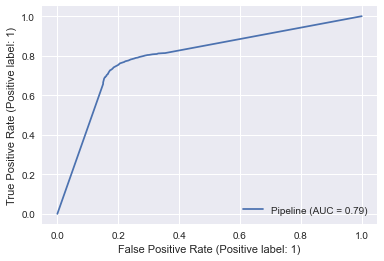

In [54]:
probas = dt_1_pipe.predict_proba(X_test)[:, 1]

# Print log-loss
print(f"Log-loss: {round(log_loss(y_test, probas), 5)}")

# Print AUC score
print(f"AUC score: {round(roc_auc_score(y_test, probas), 5)}")

# Plot roc_curve
plot_roc_curve(dt_1_pipe, X_test, y_test);

> **Remarks:**
> - As expected, the vanilla decision tree model acheived great training scores, but not nearly so great validation scores. It's overfitting to the training data. Let's try tuning some hyperparameters to see if we can improve performance on the validation / testing data.

<br>

# Model 3.2: Decision Tree, Iteration 2

We saw that the vanilla decision tree model was overfitting to the training data. Let's try tuning some hyperparameters with another GridSearchCV to reduce the overfitting. We'll try to optimize three of the main "pruning" methods of decision trees: `max_depth`, `min_samples_split`, and `min_samples_leaf`.

In [55]:
# steps=[('preprocessing', ct), 
#        ('dt', DecisionTreeClassifier(random_state=42))]

# dt_2_pipe = Pipeline(steps)

# pipe_grid = {'dt__criterion': ['gini', 'entropy'], 
#              'dt__max_depth': [32, 38, 44], 
#              'dt__min_samples_leaf': [6, 8, 10], 
#              'dt__min_samples_split': [2, 4]}

# dt_2_gs_pipe = GridSearchCV(estimator=dt_2_pipe, 
#                             param_grid=pipe_grid, 
#                             cv=5, 
#                             n_jobs=-1, 
#                             verbose=True)

# with parallel_backend('threading', n_jobs=-1):
#     dt_2_gs_pipe.fit(X_train, y_train.values.ravel())

# print(dt_2_gs_pipe.best_params_)

In [56]:
# Create new DecisionTree classifier model, with hyperparameters equal to the optimal hyperparameters found 
# with the GridSearchCV above
optimal_criterion = 'gini'  # dt_2_pipe.best_params_['dt__criterion']
optimal_max_depth = 38  # dt_2_pipe.best_params_['dt__max_depth']
optimal_min_samples_leaf = 6  #dt_2_pipe.best_params_['dt__min_samples_leaf']
optimal_min_samples_split = 2  # dt_2_pipe.best_params_['dt__min_samples_split']

steps=[('preprocessing', ct), 
       ('dt', DecisionTreeClassifier(criterion=optimal_criterion, 
                                     max_depth=optimal_max_depth, 
                                     min_samples_leaf=optimal_min_samples_leaf, 
                                     min_samples_split=optimal_min_samples_split, 
                                     random_state=42))]

dt_2_pipe = Pipeline(steps)

dt_2_pipe.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss_pipe',
                                                  Pipeline(steps=[('standard_scale',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population']),
                                                 ('bool_imputer',
                                                  SimpleImputer(fill_value=1.0,
                                                                strategy='constant'),
                                                  ['public_meeting', 'permit']),
                                                 ('con_year_pipe',
                                                  Pipeline(steps=[('con_year_imputer',
                                                                   Simple...
                                                  ['construction_year']),
                                                 ('ohe_pipe',
                                                  Pipeline(steps=[('one_hot_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['basin', 'region_code',
                                                   'district_code', 'lga',
                                                   'extraction_type',
                                                   'management', 'payment_type',
                                                   'water_quality', 'quantity',
                                                   'source',
                                                   'waterpoint_type'])])),
                ('dt',
                 DecisionTreeClassifier(max_depth=38, min_samples_leaf=6,
                                        random_state=42))])

In [57]:
print_cv_scores(dt_2_pipe, X_train, y_train)

Training Accuracy: 0.854057
Cross_Val Accuracy: 0.780657
----------------------------------------
Training Precision: 0.874136
Cross_Val Precision: 0.78624
----------------------------------------
Training Recall: 0.795227
Cross_Val Recall: 0.714356
----------------------------------------
Training F1 Score: 0.83281
Cross_Val F1 Score: 0.748553


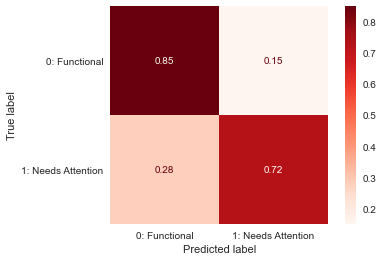

In [58]:
# Plot confusion matrix
plot_confusion_matrix(dt_2_pipe, X_test, y_test, normalize='true', display_labels=class_names, cmap='Reds')
plt.grid(False);

Log-loss: 1.84099
AUC score: 0.85665


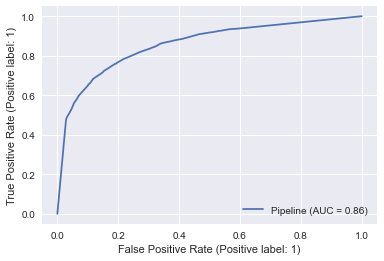

In [59]:
probas = dt_2_pipe.predict_proba(X_test)[:, 1]

# Print log-loss
print(f"Log-loss: {round(log_loss(y_test, probas), 5)}")

# Print AUC score
print(f"AUC score: {round(roc_auc_score(y_test, probas), 5)}")

# Plot roc_curve
plot_roc_curve(dt_2_pipe, X_test, y_test);

> **Remarks:**
> - Our training scores fell by quite a bit, but our validation scores improved modestly from the iteration 1 decision tree classifier. Log-loss and the AUC score also improved by a good margin. This model has the best cross-validated accuracy score of all the models so far, though the KNN model narrowly beat it out on the AUC score. We'll accept this as our final decision tree model. 

<br>

# Model 4.1: AdaBoost Classifier

So far we've used logistic regression, KNN, and decision trees as our classification models to classify the water pumps. Let's try using more advanced models now - ensemble methods - to see if we can improve our scores any further.

In [60]:
# steps=[('preprocessing', ct), 
#        ('ab_clf', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state = 42))]

# ab_1_pipe = Pipeline(steps)

# pipe_grid = {
#     'ab_clf__n_estimators': [80, 100, 120], 
#     'ab_clf__base_estimator__max_depth': [30, 35, 40]
# }

# ab_1_gs_pipe = GridSearchCV(estimator=ab_1_pipe, 
#                             param_grid=pipe_grid, 
#                             cv=3, 
#                             n_jobs=-1, 
#                             verbose=True)

# with parallel_backend('threading', n_jobs=-1):
#     ab_1_gs_pipe.fit(X_train, y_train.values.ravel())

# print(ab_1_gs_pipe.best_params_)

In [61]:
# Create AdaBoost classifier model with optimal hyperparameters found above
optimal_n_estimators = 100  # ab_1_gs_pipe.best_params_['ab_clf__n_estimators']
optimal_max_depth = 40  # ab_1_gs_pipe.best_params_['ab_clf__base_estimator__max_depth']

steps=[('preprocessing', ct), 
       ('ab_clf', AdaBoostClassifier(
           n_estimators=optimal_n_estimators, 
           base_estimator=DecisionTreeClassifier(max_depth=optimal_max_depth), 
           random_state = 42))]

ab_1_pipe = Pipeline(steps)

ab_1_pipe.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss_pipe',
                                                  Pipeline(steps=[('standard_scale',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population']),
                                                 ('bool_imputer',
                                                  SimpleImputer(fill_value=1.0,
                                                                strategy='constant'),
                                                  ['public_meeting', 'permit']),
                                                 ('con_year_pipe',
                                                  Pipeline(steps=[('con_year_imputer',
                                                                   Simple...
                                                  Pipeline(steps=[('one_hot_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['basin', 'region_code',
                                                   'district_code', 'lga',
                                                   'extraction_type',
                                                   'management', 'payment_type',
                                                   'water_quality', 'quantity',
                                                   'source',
                                                   'waterpoint_type'])])),
                ('ab_clf',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=40),
                                    n_estimators=100, random_state=42))])

In [62]:
print_cv_scores(ab_1_pipe, X_train, y_train)

Training Accuracy: 0.949956
Cross_Val Accuracy: 0.788076
----------------------------------------
Training Precision: 0.958247
Cross_Val Precision: 0.781769
----------------------------------------
Training Recall: 0.931105
Cross_Val Recall: 0.744302
----------------------------------------
Training F1 Score: 0.944469
Cross_Val F1 Score: 0.762483


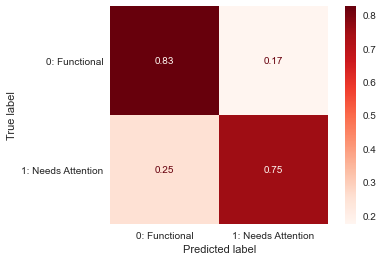

In [63]:
# Plot confusion matrix
plot_confusion_matrix(ab_1_pipe, X_test, y_test, normalize='true', display_labels=class_names, cmap='Reds')
plt.grid(False);

Log-loss: 0.52658
AUC score: 0.83905


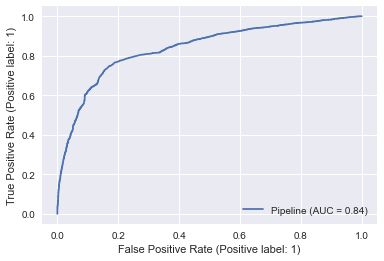

In [64]:
probas = ab_1_pipe.predict_proba(X_test)[:, 1]

# Print log-loss
print(f"Log-loss: {round(log_loss(y_test, probas), 5)}")

# Print AUC score
print(f"AUC score: {round(roc_auc_score(y_test, probas), 5)}")

# Plot roc_curve
plot_roc_curve(ab_1_pipe, X_test, y_test);

> **Remarks:**
> - The AdaBoost classifier surprisingly performed slightly better in terms of cross-validated accuracy scores than the KNN model and decision tree models, but it performed worse in terms of AUC scores on the testing data. Let's move on to a new classifier.

<br>

# Model 5.1: Gradient Boosting Classifier

Now we'll try our second ensemble method: a gradient boosting classifier

In [65]:
# steps=[('preprocessing', ct), 
#        ('gb_clf', GradientBoostingClassifier(random_state=42))]

# gb_1_pipe = Pipeline(steps)

# pipe_grid = {
#     'gb_clf__learning_rate': [0.01, 0.1],
#     'gb_clf__n_estimators': [75, 125],
#     'gb_clf__max_depth': [15, 30]
# }

# gb_1_gs_pipe = GridSearchCV(estimator=gb_1_pipe, 
#                             param_grid=pipe_grid, 
#                             cv=2, 
#                             n_jobs=-1, 
#                             verbose=True)

# with parallel_backend('threading', n_jobs=-1):
#     gb_1_gs_pipe.fit(X_train, y_train.values.ravel())

# print(gb_1_gs_pipe.best_params_)

In [66]:
# Create GradientBoosting classifier model with optimal hyperparameters found above
optimal_learning_rate = 0.1  # gb_1_gs_pipe.best_params_['gb_clf__learning_rate']
optimal_n_estimators = 125  # gb_1_gs_pipe.best_params_['gb_clf__n_estimators']
optimal_max_depth = 15  # gb_1_gs_pipe.best_params_['gb_clf__max_depth']

steps=[('preprocessing', ct), 
       ('gb_clf', GradientBoostingClassifier(
           learning_rate=optimal_learning_rate, 
           n_estimators=optimal_n_estimators, 
           max_depth=optimal_max_depth, 
           random_state = 42))]

gb_1_pipe = Pipeline(steps)

gb_1_pipe.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss_pipe',
                                                  Pipeline(steps=[('standard_scale',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population']),
                                                 ('bool_imputer',
                                                  SimpleImputer(fill_value=1.0,
                                                                strategy='constant'),
                                                  ['public_meeting', 'permit']),
                                                 ('con_year_pipe',
                                                  Pipeline(steps=[('con_year_imputer',
                                                                   Simple...
                                                 ('ohe_pipe',
                                                  Pipeline(steps=[('one_hot_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['basin', 'region_code',
                                                   'district_code', 'lga',
                                                   'extraction_type',
                                                   'management', 'payment_type',
                                                   'water_quality', 'quantity',
                                                   'source',
                                                   'waterpoint_type'])])),
                ('gb_clf',
                 GradientBoostingClassifier(max_depth=15, n_estimators=125,
                                            random_state=42))])

In [67]:
print_cv_scores(gb_1_pipe, X_train, y_train)

Training Accuracy: 0.941838
Cross_Val Accuracy: 0.803139
----------------------------------------
Training Precision: 0.957409
Cross_Val Precision: 0.809134
----------------------------------------
Training Recall: 0.913419
Cross_Val Recall: 0.745338
----------------------------------------
Training F1 Score: 0.934879
Cross_Val F1 Score: 0.77579


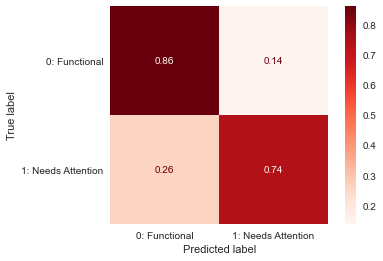

In [68]:
# Plot confusion matrix
plot_confusion_matrix(gb_1_pipe, X_test, y_test, normalize='true', display_labels=class_names, cmap='Reds')
plt.grid(False);

Log-loss: 0.42893
AUC score: 0.88596


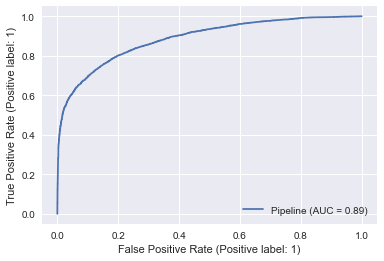

In [69]:
probas = gb_1_pipe.predict_proba(X_test)[:, 1]

# Print log-loss
print(f"Log-loss: {round(log_loss(y_test, probas), 5)}")

# Print AUC score
print(f"AUC score: {round(roc_auc_score(y_test, probas), 5)}")

# Plot roc_curve
plot_roc_curve(gb_1_pipe, X_test, y_test);

> **Remarks:**
> - The gradient boosting classifier performed excellently, beating out all our models thus far by a solid margin. We've reached about 80% cross-validated accuracy and a >88% AUC score on the testing data with our gradient boosting classification model.

<br>

# Model 6.1: Random Forest Classifier

Now onto our next ensemble method: a random forest classifier

In [70]:
# steps=[('preprocessing', ct), 
#        ('rf_clf', RandomForestClassifier(random_state=42))]

# rf_1_pipe = Pipeline(steps)

# pipe_grid = {
#     'rf_clf__n_estimators': [75, 100],
#     'rf_clf__min_samples_leaf': [2, 3, 4], 
#     'rf_clf__min_samples_split': [4, 6, 8]
# }

# rf_1_gs_pipe = GridSearchCV(estimator=rf_1_pipe, 
#                             param_grid=pipe_grid, 
#                             cv=3, 
#                             n_jobs=-1, 
#                             verbose=True)

# with parallel_backend('threading', n_jobs=-1):
#     rf_1_gs_pipe.fit(X_train, y_train.values.ravel())

# print(rf_1_gs_pipe.best_params_)

In [71]:
# Create RandomForest classifier model with optimal hyperparameters found above
optimal_n_estimators = 75  # rf_1_gs_pipe.best_params_['rf_clf__n_estimators']
optimal_min_samples_leaf = 2  # rf_1_gs_pipe.best_params_['rf_clf__min_samples_leaf']
optimal_min_samples_split = 4  # rf_1_gs_pipe.best_params_['rf_clf__min_samples_split']

steps=[('preprocessing', ct), 
       ('rf_clf', RandomForestClassifier(
           n_estimators=optimal_n_estimators, 
           min_samples_leaf=optimal_min_samples_leaf, 
           min_samples_split=optimal_min_samples_split, 
           random_state = 42))]

rf_1_pipe = Pipeline(steps)

rf_1_pipe.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss_pipe',
                                                  Pipeline(steps=[('standard_scale',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population']),
                                                 ('bool_imputer',
                                                  SimpleImputer(fill_value=1.0,
                                                                strategy='constant'),
                                                  ['public_meeting', 'permit']),
                                                 ('con_year_pipe',
                                                  Pipeline(steps=[('con_year_imputer',
                                                                   Simple...
                                                  Pipeline(steps=[('one_hot_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['basin', 'region_code',
                                                   'district_code', 'lga',
                                                   'extraction_type',
                                                   'management', 'payment_type',
                                                   'water_quality', 'quantity',
                                                   'source',
                                                   'waterpoint_type'])])),
                ('rf_clf',
                 RandomForestClassifier(min_samples_leaf=2, min_samples_split=4,
                                        n_estimators=75, random_state=42))])

In [72]:
print_cv_scores(rf_1_pipe, X_train, y_train)

Training Accuracy: 0.875417
Cross_Val Accuracy: 0.806025
----------------------------------------
Training Precision: 0.90133
Cross_Val Precision: 0.821262
----------------------------------------
Training Recall: 0.816885
Cross_Val Recall: 0.735866
----------------------------------------
Training F1 Score: 0.85702
Cross_Val F1 Score: 0.776148


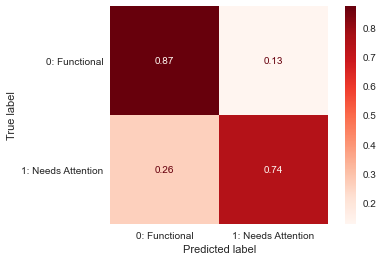

In [73]:
# Plot confusion matrix
plot_confusion_matrix(rf_1_pipe, X_test, y_test, normalize='true', display_labels=class_names, cmap='Reds')
plt.grid(False);

Log-loss: 0.4188
AUC score: 0.88941


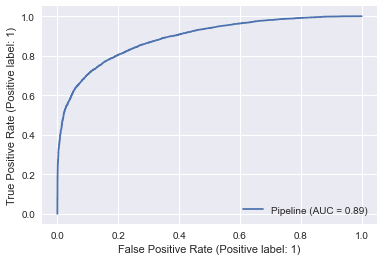

In [74]:
probas = rf_1_pipe.predict_proba(X_test)[:, 1]

# Print log-loss
print(f"Log-loss: {round(log_loss(y_test, probas), 5)}")

# Print AUC score
print(f"AUC score: {round(roc_auc_score(y_test, probas), 5)}")

# Plot roc_curve
plot_roc_curve(rf_1_pipe, X_test, y_test);

> **Remarks:**
> - It wasn't a game-changer, but the random forest classifier is the top performing model so far in terms of both cross-validated accuracy and AUC scores. Let's move on to our final ensemble method.

<br>

# Model 7.1: XGBoost Classifier

For our final ensemble method, we're going to use an extreme gradient boost (XGBoost) classifier to see if we can beat out all of our previous models.

In [77]:
steps=[('preprocessing', ct), 
       ('xgb_clf', XGBClassifier(random_state=42))]

xgb_1_pipe = Pipeline(steps)

pipe_grid = {
    'xgb_clf__learning_rate': [0.05, 0.1],
    'xgb_clf__max_depth': [20, 30],
    'xgb_clf__n_estimators': [75, 125],
    'xgb_clf__gamma': [0, 3]
}

xgb_1_gs_pipe = GridSearchCV(estimator=xgb_1_pipe, 
                            param_grid=pipe_grid, 
                            cv=3, 
                            n_jobs=-1, 
                            verbose=True)

with parallel_backend('threading', n_jobs=-1):
    xgb_1_gs_pipe.fit(X_train, y_train.values.ravel())

print(xgb_1_gs_pipe.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'xgb_clf__gamma': 3, 'xgb_clf__learning_rate': 0.05, 'xgb_clf__max_depth': 20, 'xgb_clf__n_estimators': 125}


In [94]:
# Create XGBoost classifier model with optimal hyperparameters found above
optimal_learning_rate = 0.05  # xgb_1_gs_pipe.best_params_['xgb_clf__learning_rate']
optimal_max_depth = 20  # xgb_1_gs_pipe.best_params_['xgb_clf__max_depth']
optimal_n_estimators = 125  # xgb_1_gs_pipe.best_params_['xgb_clf__n_estimators']
optimal_gamma = 3  # xgb_1_gs_pipe.best_params_['xgb_clf__gamma']

steps=[('preprocessing', ct), 
       ('xgb_clf', XGBClassifier(
           learning_rate=optimal_learning_rate, 
           max_depth=optimal_max_depth, 
           n_estimators=optimal_n_estimators, 
           gamma=optimal_gamma, 
           random_state = 42))]

xgb_1_pipe = Pipeline(steps)

xgb_1_pipe.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss_pipe',
                                                  Pipeline(steps=[('standard_scale',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population']),
                                                 ('bool_imputer',
                                                  SimpleImputer(fill_value=1.0,
                                                                strategy='constant'),
                                                  ['public_meeting', 'permit']),
                                                 ('con_year_pipe',
                                                  Pipeline(steps=[('con_year_imputer',
                                                                   Simple...
                               gamma=3, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.05, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=20, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=125, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=42, reg_alpha=0,
                               reg_lambda=1, ...))])

In [95]:
print_cv_scores(xgb_1_pipe, X_train, y_train)

Training Accuracy: 0.871313
Cross_Val Accuracy: 0.807491
----------------------------------------
Training Precision: 0.905795
Cross_Val Precision: 0.827725
----------------------------------------
Training Recall: 0.801862
Cross_Val Recall: 0.73108
----------------------------------------
Training F1 Score: 0.850662
Cross_Val F1 Score: 0.77634


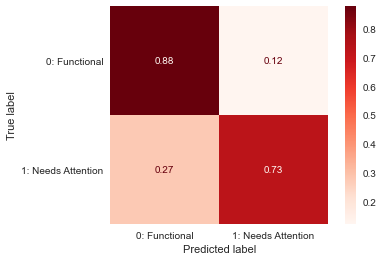

In [96]:
# Plot confusion matrix
plot_confusion_matrix(xgb_1_pipe, X_test, y_test, normalize='true', display_labels=class_names, cmap='Reds')
plt.grid(False);

Log-loss: 0.40201
AUC score: 0.89139


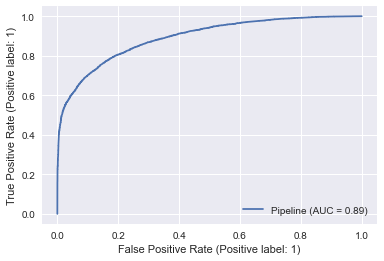

In [97]:
probas = xgb_1_pipe.predict_proba(X_test)[:, 1]

# Print log-loss
print(f"Log-loss: {round(log_loss(y_test, probas), 5)}")

# Print AUC score
print(f"AUC score: {round(roc_auc_score(y_test, probas), 5)}")

# Plot roc_curve
plot_roc_curve(xgb_1_pipe, X_test, y_test);

> **Remarks:**
> - The XGBoost did indeed outperform our previous best classification model, the random forest model. It wasn't by a whole lot though, with less than 0.01 difference in both cross-validated accuracy and AUC scores.

<br>

In [190]:
xgb_1_pipe['xgb_clf'].feature_importances_

array([0.00455281, 0.00193074, 0.00185269, 0.00296163, 0.0020519 ,
       0.00359907, 0.00391016, 0.00302834, 0.00356282, 0.00303098,
       0.00277083, 0.00218318, 0.00242386, 0.00253182, 0.00501848,
       0.003107  , 0.00251662, 0.00276097, 0.00222167, 0.00228268,
       0.00190396, 0.00201011, 0.00197789, 0.01641989, 0.00535488,
       0.00541432, 0.00290976, 0.00703692, 0.00241593, 0.0030669 ,
       0.00643938, 0.00236408, 0.002674  , 0.00243031, 0.00241835,
       0.        , 0.00206122, 0.00186741, 0.00200267, 0.00207059,
       0.00275703, 0.00241849, 0.00188155, 0.00288805, 0.00245499,
       0.00254203, 0.0022024 , 0.00328303, 0.00154237, 0.00186308,
       0.00928428, 0.00438513, 0.00201196, 0.0031063 , 0.00117886,
       0.00178073, 0.00107839, 0.        , 0.        , 0.00220256,
       0.00266746, 0.00340206, 0.00163521, 0.00413217, 0.00123084,
       0.00109654, 0.        , 0.00118953, 0.00171938, 0.00533108,
       0.00195667, 0.03270494, 0.00160835, 0.00532922, 0.00429

In [191]:
ct.get_feature_names_out()

array(['ss_pipe__amount_tsh', 'ss_pipe__gps_height',
       'ss_pipe__population', 'bool_imputer__public_meeting',
       'bool_imputer__permit', 'con_year_pipe__construction_year',
       'ohe_pipe__basin_Lake Nyasa', 'ohe_pipe__basin_Lake Rukwa',
       'ohe_pipe__basin_Lake Tanganyika', 'ohe_pipe__basin_Lake Victoria',
       'ohe_pipe__basin_Pangani', 'ohe_pipe__basin_Rufiji',
       'ohe_pipe__basin_Ruvuma / Southern Coast',
       'ohe_pipe__basin_Wami / Ruvu', 'ohe_pipe__region_code_2',
       'ohe_pipe__region_code_3', 'ohe_pipe__region_code_4',
       'ohe_pipe__region_code_5', 'ohe_pipe__region_code_6',
       'ohe_pipe__region_code_7', 'ohe_pipe__region_code_8',
       'ohe_pipe__region_code_9', 'ohe_pipe__region_code_10',
       'ohe_pipe__region_code_11', 'ohe_pipe__region_code_12',
       'ohe_pipe__region_code_13', 'ohe_pipe__region_code_14',
       'ohe_pipe__region_code_15', 'ohe_pipe__region_code_16',
       'ohe_pipe__region_code_17', 'ohe_pipe__region_code_18',
    

In [192]:
temp = pd.DataFrame(xgb_1_pipe['xgb_clf'].feature_importances_)
temp.reset_index
temp.index = ct.get_feature_names_out()
temp.columns = ['feature_importance']

In [193]:
temp

,feature_importance
ss_pipe__amount_tsh,0.004553
ss_pipe__gps_height,0.001931
ss_pipe__population,0.001853
bool_imputer__public_meeting,0.002962
bool_imputer__permit,0.002052
...,...
ohe_pipe__waterpoint_type_communal standpipe multiple,0.017801
ohe_pipe__waterpoint_type_dam,0.000000
ohe_pipe__waterpoint_type_hand pump,0.002291
ohe_pipe__waterpoint_type_improved spring,0.002935


In [194]:
temp = temp.sort_values(axis=0, by='feature_importance', ascending=False)[:10].reset_index()
temp = temp.rename({'index': 'model'}, axis=1)
temp

,model,feature_importance
0,ohe_pipe__waterpoint_type_other,0.195925
1,ohe_pipe__quantity_seasonal,0.069563
2,ohe_pipe__quantity_insufficient,0.037912
3,ohe_pipe__lga_Chunya,0.032705
4,ohe_pipe__quantity_enough,0.032557
5,ohe_pipe__waterpoint_type_communal standpipe m...,0.017801
6,ohe_pipe__region_code_11,0.016420
7,ohe_pipe__quantity_unknown,0.011491
8,ohe_pipe__lga_Kahama,0.010166
9,ohe_pipe__lga_Kondoa,0.009987


In [216]:
# fig = px.bar(temp, x='feature_importance', y='model', orientation='h')
# fig.show()

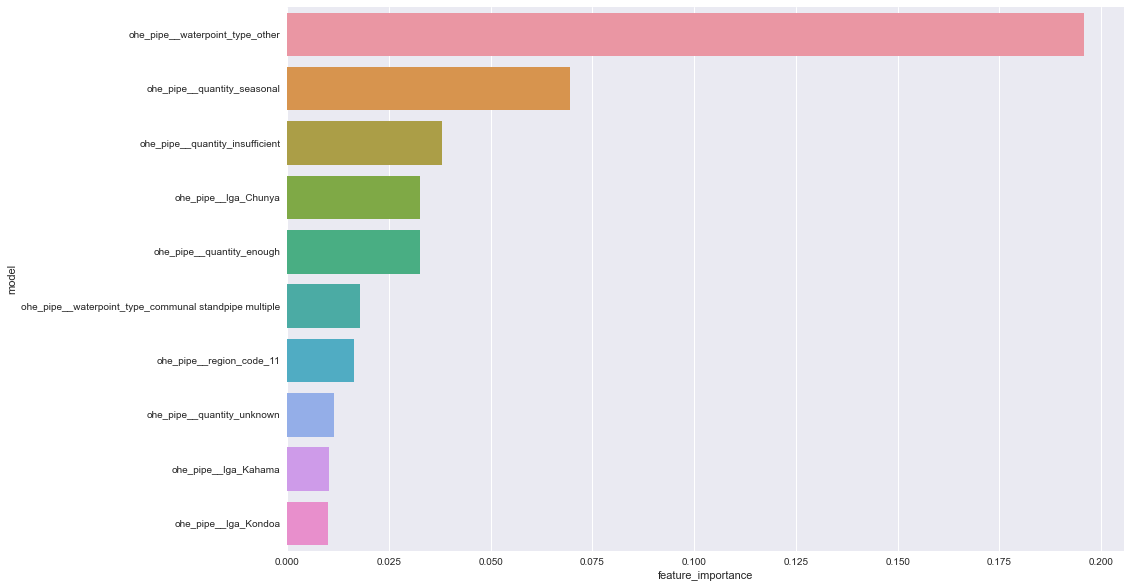

In [215]:
f, ax = plt.subplots(figsize=(15, 10))

sns.barplot(temp.feature_importance, temp.model, orient='h');